<h3><font style="color:red;">Title:- </font>
Develop classification model for cat-dogs dataset using CNN model. Analyze the model accuracy and generate classification report.</h3>

* Develop an application and test the user given inputs.
* Analyze the result with and without regularization/dropout 



<h3><font style="color:red;">Implementation Code:</font></h3>
Implementation of CNN Custom Dataset (Cat-Dog)

<h3><font style="color:red;">Dataset Used:</font></h3>
1.Kaggle - Cat VS Dog 

### import all necessary libararies

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
import keras

In [4]:
train_dir = r"D:\DataSets\Cat_and_Dog\training_set"
test_dir = r"D:\DataSets\Cat_and_Dog\test_set"

In [5]:
train_data=ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_data=ImageDataGenerator(rescale=1./255)

In [6]:
train_set=train_data.flow_from_directory(directory=train_dir,target_size=(128,128),batch_size=32,color_mode="rgb",class_mode = 'binary')
validation_set=test_data.flow_from_directory(directory=test_dir,target_size=(128,128),batch_size=30,shuffle=True,class_mode = 'binary',color_mode="rgb")

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


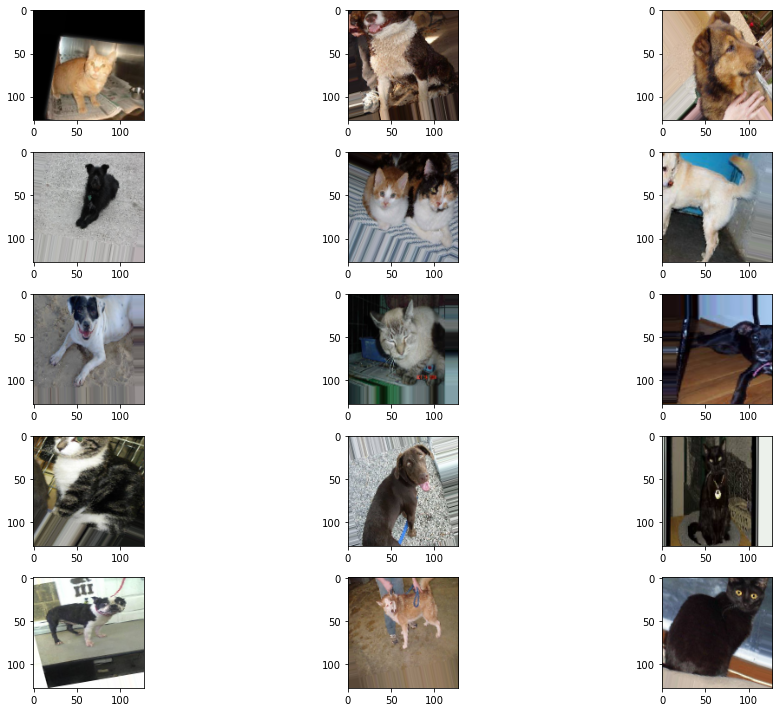

In [10]:
plt.figure(figsize=(15, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for img in next(train_set):
        image = img[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

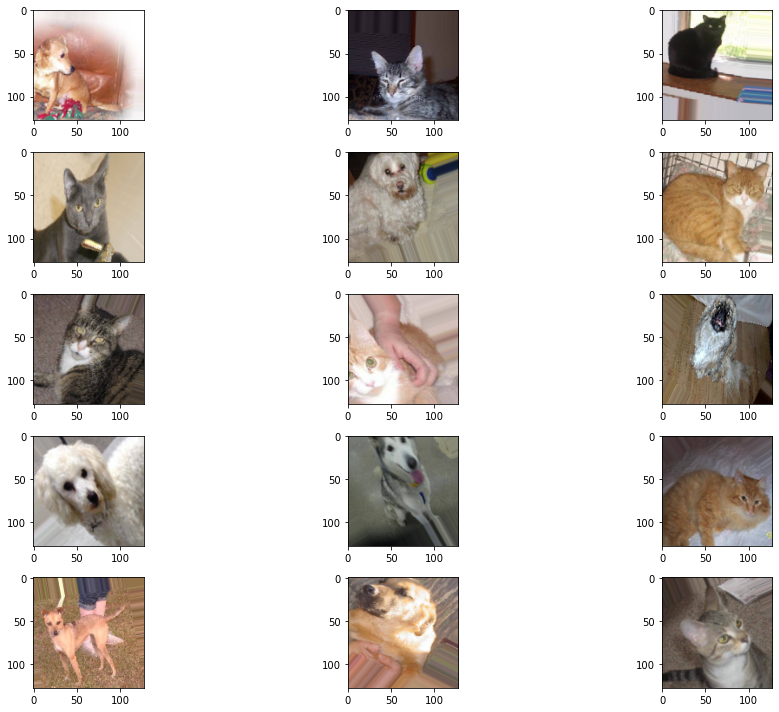

In [11]:
plt.figure(figsize=(15, 10))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for img in next(train_set):
        image = img[1]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [13]:
cnn1 = Sequential()
cnn1.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Conv2D(64,(3,3),activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Flatten())

# Dense layer
cnn1.add(Dense(256,activation='relu'))
cnn1.add(Dropout(0.5))
cnn1.add(Dense(1,activation='sigmoid'))

In [16]:
# summary of the model
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_1 (Dense)             (None, 256)              

In [17]:
# compile the model
cnn1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model_history=cnn1.fit(train_set,validation_data=validation_set,epochs=15)

Epoch 1/15
250/250 [==============================] - 334s 1s/step - loss: 0.6953 - accuracy: 0.5683 - val_loss: 0.6560 - val_accuracy: 0.6135
Epoch 2/15
250/250 [==============================] - 270s 1s/step - loss: 0.6485 - accuracy: 0.6187 - val_loss: 0.6373 - val_accuracy: 0.6400
Epoch 3/15
250/250 [==============================] - 273s 1s/step - loss: 0.6377 - accuracy: 0.6415 - val_loss: 0.5985 - val_accuracy: 0.6910
Epoch 4/15
250/250 [==============================] - 278s 1s/step - loss: 0.6181 - accuracy: 0.6655 - val_loss: 0.5649 - val_accuracy: 0.7275
Epoch 5/15
250/250 [==============================] - 248s 990ms/step - loss: 0.6047 - accuracy: 0.6686 - val_loss: 0.5704 - val_accuracy: 0.7135
Epoch 6/15
250/250 [==============================] - 260s 1s/step - loss: 0.5824 - accuracy: 0.6923 - val_loss: 0.5438 - val_accuracy: 0.7185
Epoch 7/15
250/250 [==============================] - 269s 1s/step - loss: 0.5795 - accuracy: 0.6930 - val_loss: 0.5090 - val_accuracy: 0.7

In [20]:
cnn1.save('dog-cat-cnn1.h5')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


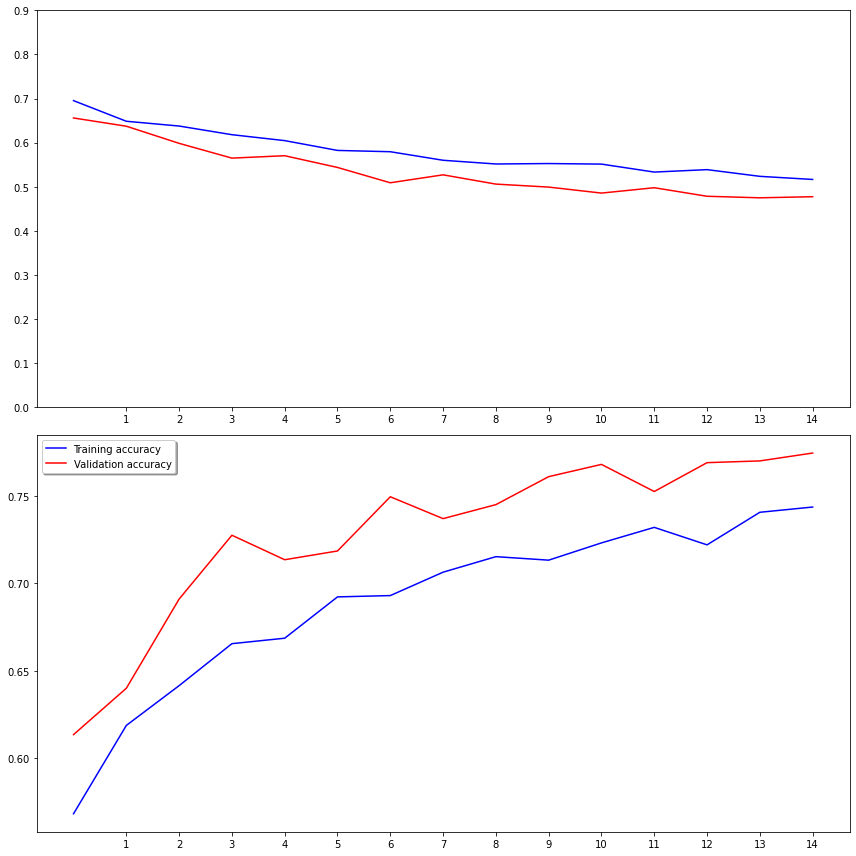

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
history = model_history
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 15, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
legend = plt.legend(loc='best', shadow=True)
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 15, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [8]:
cnn1 = Sequential()
 
cnn1.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.2))

cnn1.add(Conv2D(64,(3,3),activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.5))

cnn1.add(Flatten())

cnn1.add(Dense(256,activation='relu'))
cnn1.add(Dropout(0.5))
cnn1.add(Dense(1,activation='sigmoid'))

In [9]:
# summary of the model
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [10]:
cnn1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
model_history=cnn1.fit(train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
250/250 [==============================] - 307s 1s/step - loss: 0.7297 - accuracy: 0.5585 - val_loss: 0.6352 - val_accuracy: 0.6630
Epoch 2/10
250/250 [==============================] - 325s 1s/step - loss: 0.6245 - accuracy: 0.6553 - val_loss: 0.5961 - val_accuracy: 0.6905
Epoch 3/10
250/250 [==============================] - 326s 1s/step - loss: 0.5633 - accuracy: 0.7100 - val_loss: 0.5585 - val_accuracy: 0.6985
Epoch 4/10
250/250 [==============================] - 309s 1s/step - loss: 0.5171 - accuracy: 0.7418 - val_loss: 0.5172 - val_accuracy: 0.7420
Epoch 5/10
250/250 [==============================] - 282s 1s/step - loss: 0.4743 - accuracy: 0.7760 - val_loss: 0.5100 - val_accuracy: 0.7500
Epoch 6/10
250/250 [==============================] - 201s 801ms/step - loss: 0.4191 - accuracy: 0.8069 - val_loss: 0.5121 - val_accuracy: 0.7615
Epoch 7/10
250/250 [==============================] - 183s 731ms/step - loss: 0.3686 - accuracy: 0.8349 - val_loss: 0.5197 - val_accuracy: 

In [12]:
cnn1.save('dog-cat-model_2.h5')

In [7]:
cnn2 = Sequential()
 
cnn2.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Dropout(0.2))

cnn2.add(Conv2D(64,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Dropout(0.5))

cnn2.add(Flatten())

cnn2.add(Dense(256,activation='relu'))
cnn2.add(Dropout(0.5))
cnn2.add(Dense(1,activation='sigmoid'))
cnn2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10,monitor="val_accuracy",)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [9]:
model_history=cnn2.fit(train_set,validation_data=validation_set,epochs=10,callbacks= callbacks)

Epoch 1/10
250/250 [==============================] - 404s 2s/step - loss: 0.7370 - accuracy: 0.5405 - val_loss: 0.6829 - val_accuracy: 0.5670 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - 413s 2s/step - loss: 0.6867 - accuracy: 0.5580 - val_loss: 0.6798 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 3/10
250/250 [==============================] - 384s 2s/step - loss: 0.6748 - accuracy: 0.5754 - val_loss: 0.6637 - val_accuracy: 0.5895 - lr: 0.0010
Epoch 4/10
250/250 [==============================] - 433s 2s/step - loss: 0.6591 - accuracy: 0.6096 - val_loss: 0.6412 - val_accuracy: 0.6310 - lr: 0.0010
Epoch 5/10
250/250 [==============================] - 404s 2s/step - loss: 0.6470 - accuracy: 0.6245 - val_loss: 0.6230 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 6/10
250/250 [==============================] - 397s 2s/step - loss: 0.6290 - accuracy: 0.6524 - val_loss: 0.5962 - val_accuracy: 0.6945 - lr: 0.0010
Epoch 7/10
250/250 [==============================] - 400s 2s/st

In [14]:
cnn2 = Sequential()
 
cnn2.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Dropout(0.2))


cnn2.add(Conv2D(64,(3,3),activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Dropout(0.5))


cnn2.add(Flatten())

# Dense layer
cnn2.add(Dense(256,activation='relu'))
cnn2.add(Dropout(0.5))
cnn2.add(Dense(1,activation='sigmoid'))
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 64)       

In [16]:
cnn2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history=cnn2.fit(train_set,validation_data=validation_set,epochs=10)

Epoch 1/10
250/250 [==============================] - 327s 1s/step - loss: 0.7072 - accuracy: 0.5924 - val_loss: 0.5697 - val_accuracy: 0.7215
Epoch 2/10
250/250 [==============================] - 318s 1s/step - loss: 0.5790 - accuracy: 0.7060 - val_loss: 0.5388 - val_accuracy: 0.7520
Epoch 3/10
250/250 [==============================] - 307s 1s/step - loss: 0.5141 - accuracy: 0.7524 - val_loss: 0.5144 - val_accuracy: 0.7520
Epoch 4/10
250/250 [==============================] - 303s 1s/step - loss: 0.4676 - accuracy: 0.7865 - val_loss: 0.4952 - val_accuracy: 0.7690
Epoch 5/10
250/250 [==============================] - 300s 1s/step - loss: 0.4400 - accuracy: 0.7984 - val_loss: 0.5233 - val_accuracy: 0.7545
Epoch 6/10
250/250 [==============================] - 304s 1s/step - loss: 0.4142 - accuracy: 0.8160 - val_loss: 0.5138 - val_accuracy: 0.7685
Epoch 7/10
250/250 [==============================] - 301s 1s/step - loss: 0.3867 - accuracy: 0.8315 - val_loss: 0.5049 - val_accuracy: 0.7675

In [ ]:
cnn2.save('dog-cat-model_3.h5')